In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [5]:
fouryears = pd.read_pickle("./4years.pkl")
print (fouryears)

        CDateTime SalesPoint  SalesChannelKey         GroupCat ItemSize  \
0      2015-01-01      LWSR                 4       WALL TILES        P   
1      2015-01-01      LWSR                 4      FLOOR TILES        L   
2      2015-01-01      LWSR                 4            GROUT        Q   
3      2015-01-01      LWSR                 4            GROUT        Q   
4      2015-01-01      LWSR                 4            GROUT        Q   
5      2015-01-01      DELUN                2       WALL TILES        V   
6      2015-01-01      FDAMT                5           MORTAR        P   
7      2015-01-01      KDSR                 5      FLOOR TILES        L   
8      2015-01-01      KDSR                 5      FLOOR TILES        M   
9      2015-01-01      FDKEG                5       WALL TILES        R   
10     2015-01-01      CAKAN                1       WALL TILES        G   
11     2015-01-01      CAKAN                1       WALL TILES        D   
12     2015-01-01      LW

In [6]:
FT_data = fouryears.loc[fouryears.GroupCat=='FLOOR TILES'].reset_index(drop=True)  # Separate floor tiles
print (FT_data)

        CDateTime SalesPoint  SalesChannelKey     GroupCat ItemSize  \
0      2015-01-01      LWSR                 4  FLOOR TILES        L   
1      2015-01-01      KDSR                 5  FLOOR TILES        L   
2      2015-01-01      KDSR                 5  FLOOR TILES        M   
3      2015-01-01      FDPER                5  FLOOR TILES        U   
4      2015-01-01      FDAVI                5  FLOOR TILES        L   
5      2015-01-01      FDAVI                5  FLOOR TILES        U   
6      2015-01-01      DELUN                2  FLOOR TILES        M   
7      2015-01-01      FDMTL                5  FLOOR TILES        U   
8      2015-01-01      FDEMB                5  FLOOR TILES        A   
9      2015-01-01      JWSR                 4  FLOOR TILES        M   
10     2015-01-01      JWSR                 4  FLOOR TILES        U   
11     2015-01-01      FDWAP                5  FLOOR TILES        U   
12     2015-01-01      FDWAP                5  FLOOR TILES        U   
13    

In [7]:
del (FT_data['GroupCat'])  # Remove the unwanted column
print (FT_data)

        CDateTime SalesPoint  SalesChannelKey ItemSize  DiscountPcnt   QTY
0      2015-01-01      LWSR                 4        L           0.0     6
1      2015-01-01      KDSR                 5        L           0.0    25
2      2015-01-01      KDSR                 5        M           0.0    12
3      2015-01-01      FDPER                5        U           5.0    32
4      2015-01-01      FDAVI                5        L           5.0    79
5      2015-01-01      FDAVI                5        U           5.0    64
6      2015-01-01      DELUN                2        M           0.0   229
7      2015-01-01      FDMTL                5        U           0.0     8
8      2015-01-01      FDEMB                5        A           5.0   230
9      2015-01-01      JWSR                 4        M           5.0    24
10     2015-01-01      JWSR                 4        U           0.0   167
11     2015-01-01      FDWAP                5        U           0.0    50
12     2015-01-01      FD

In [8]:
FT_data = FT_data[(FT_data.SalesPoint != 'DELUN')]
FT_data = FT_data[(FT_data.SalesPoint != 'LWSR ')]

In [6]:
x=sorted(FT_data.ItemSize.unique())
print (x)
len(x)

['A', 'B', 'C', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


19

In [7]:
y=sorted(FT_data.SalesChannelKey.unique())
print (y)
len(y)

[-1, 1, 2, 4, 5, 7]


6

In [9]:
floor_names = FT_data['SalesPoint'].unique().tolist()   # Salaepoints names
print (len(floor_names))

138


In [10]:
floor_names = sorted(floor_names)   # Sort the names
print (floor_names)

['CABLM', 'CADAM', 'CAEHE', 'CAGOG', 'CAKAN', 'CAMAT', 'CAMTG', 'CAPEL', 'CARAP', 'DBALU', 'DBANG', 'DBANU', 'DBBAN', 'DBCO2', 'DBCO3', 'DBCOL', 'DBDAM', 'DBDIG', 'DBGAL', 'DBHAN', 'DBHOR', 'DBJF1', 'DBJF2', 'DBKEG', 'DBKIR', 'DBKUR', 'DBMAT', 'DBMHI', 'DBMTU', 'DBNAR', 'DBNAW', 'DBNEG', 'DBNUG', 'DBPER', 'DBPIL', 'DBRAP', 'DBRAT', 'DBSAM', 'DBTHI', 'DBVAU', 'DBVAV', 'DBWEN', 'FDALU', 'FDAMB', 'FDAMP', 'FDAMT', 'FDAVI', 'FDAVS', 'FDBA1', 'FDBA2', 'FDBAD', 'FDBAL', 'FDBDU', 'FDCHI', 'FDCHW', 'FDDAM', 'FDEMB', 'FDGAL', 'FDGAM', 'FDGAP', 'FDHOR', 'FDHRN', 'FDJAF', 'FDJEL', 'FDKAD', 'FDKAL', 'FDKAN', 'FDKDW', 'FDKEG', 'FDKLT', 'FDKOT', 'FDKUR', 'FDMAT', 'FDMHI', 'FDMIN', 'FDMON', 'FDMOT', 'FDMTL', 'FDMTU', 'FDNEG', 'FDNIT', 'FDPER', 'FDPND', 'FDRAT', 'FDVAV', 'FDWAP', 'FDWAR', 'FDWAT', 'FDWEL', 'FDWEN', 'JWSR ', 'KDSR ', 'LPABE', 'LPAH3', 'LPAKF', 'LPALL', 'LPAS1', 'LPBAT', 'LPCB2', 'LPCC3', 'LPCH1', 'LPCOS', 'LPGL1', 'LPHB1', 'LPIG1', 'LPJAH', 'LPKLF', 'LPLAS', 'LPLE1', 'LPMAH', 'LPMH3', 

In [11]:
floor_datas = {}
for i, g in FT_data.groupby('SalesPoint'):
    floor_datas.update({'floor_' + str(i) : g.reset_index(drop=True)})  # Create dataframes for each salespoint inside a dictionary
print ('end')

end


In [11]:
print (floor_datas.keys())

dict_keys(['floor_CABLM', 'floor_CADAM', 'floor_CAEHE', 'floor_CAGOG', 'floor_CAKAN', 'floor_CAMAT', 'floor_CAMTG', 'floor_CAPEL', 'floor_CARAP', 'floor_DBALU', 'floor_DBANG', 'floor_DBANU', 'floor_DBBAN', 'floor_DBCO2', 'floor_DBCO3', 'floor_DBCOL', 'floor_DBDAM', 'floor_DBDIG', 'floor_DBGAL', 'floor_DBHAN', 'floor_DBHOR', 'floor_DBJF1', 'floor_DBJF2', 'floor_DBKEG', 'floor_DBKIR', 'floor_DBKUR', 'floor_DBMAT', 'floor_DBMHI', 'floor_DBMTU', 'floor_DBNAR', 'floor_DBNAW', 'floor_DBNEG', 'floor_DBNUG', 'floor_DBPER', 'floor_DBPIL', 'floor_DBRAP', 'floor_DBRAT', 'floor_DBSAM', 'floor_DBTHI', 'floor_DBVAU', 'floor_DBVAV', 'floor_DBWEN', 'floor_FDALU', 'floor_FDAMB', 'floor_FDAMP', 'floor_FDAMT', 'floor_FDAVI', 'floor_FDAVS', 'floor_FDBA1', 'floor_FDBA2', 'floor_FDBAD', 'floor_FDBAL', 'floor_FDBDU', 'floor_FDCHI', 'floor_FDCHW', 'floor_FDDAM', 'floor_FDEMB', 'floor_FDGAL', 'floor_FDGAM', 'floor_FDGAP', 'floor_FDHOR', 'floor_FDHRN', 'floor_FDJAF', 'floor_FDJEL', 'floor_FDKAD', 'floor_FDKAL',

In [12]:
print (len(floor_datas.keys()))

138


In [13]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 7
#plt.figure(figsize = (12, 9))
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import datetime

floorFeature_matrix = pd.DataFrame()
floorLabel_matrix = pd.DataFrame()
floor_sp_num = 0
year_dic = {'2015':0, '2016':1, '2017':2, '2018':3, '2019':4}
rem_list = list()
add_list = list()

arr = list()
floor_l = ['A','B','C','G','H','J','K','L','M','N','P','Q','S','T','U','V','W','X','Y']

for sp in floor_datas.keys():
    
    ######### Total sales #########
    
    sales = floor_datas[sp].filter(['CDateTime','QTY'], axis=1)   # extract 2 columns
    sales_aggre = sales.groupby('CDateTime').agg({'QTY':'sum'})  # group per day

    t_index = pd.DatetimeIndex(start='2015-01-01', end='2018-12-31', freq='1D')
    sales_aggre = sales_aggre.reindex(t_index).fillna(0)

    sales_aggre = sales_aggre.QTY.resample('W').sum()       # convert daily to weekly
    sales_aggre = pd.DataFrame(sales_aggre)

    nonzero_weeks = (sales_aggre['QTY'] != 0).sum()  # Check whether salespoint has data of atleast 24 weeks(6 months). If not, remove that salespoint
    if (nonzero_weeks < 24):
        rem_list.append(sp)
        continue
    add_list.append('Is'+sp[6:])
    
    ################################
    
    ###### Weeks to New year ######
    w1 = sales_aggre.index.week
    w2 = list()
    yearNow=2015
    weeks_per_year=53
    newyear_week = datetime.date(2015, 4, 14).isocalendar()[1]  # Find the new year week
    con = True
    
    for i in range(len(w1)):
        if (con):
            x = newyear_week - w1[i]
        else:
            x = newyear_week + (weeks_per_year-w1[i])
            if (w1[i]==weeks_per_year):
                con=True
        if (x==0):
            weeks_per_year = datetime.date(yearNow, 12, 28).isocalendar()[1]
            newyear_week = datetime.date(yearNow+1, 4, 14).isocalendar()[1]
            yearNow += 1
            con=False
        w2.append(x)
    ################################
    
    ###### Weeks to Christmas ######
    w3 = list()
    yearNow=2017
    christmas_week = datetime.date(2015, 12, 25).isocalendar()[1]  # Find the Christmas week
    con = True
    
    for i in range(len(w1)):
        if (con==True):
            y = christmas_week - w1[i]
        else:
            y = christmas_week
            con=True
        if (y==0):
            if (w1[i]<datetime.date(yearNow+1, 1, 1).isocalendar()[1]):
                con=False
            christmas_week = datetime.date(yearNow+1, 12, 25).isocalendar()[1]
            yearNow += 1
        w3.append(y)
    ################################
    
    ################### Feature matrix & Label matrix ##################
    
    ################### Year, Month, Week ####################
    
    floor_features = pd.DataFrame(index=sales_aggre.index)     # wall_features dataframe stores all the features for one salespoint
        
    floor_features['Year'] = pd.Series(sales_aggre.index.year, index=floor_features.index)     # Year
    labelencoder = LabelEncoder()
    floor_features.iloc[:, 0] = labelencoder.fit_transform(floor_features.iloc[:, 0])  # Label encoded the year
     
    df_month = pd.DataFrame(sales_aggre.index.month)                # Month
    onehotencoder = OneHotEncoder(categorical_features = [0])
    array_month = onehotencoder.fit_transform(df_month).toarray()  # One hot encoded the 12 months
    df_month = pd.DataFrame(array_month, columns=['IsJan','IsFeb','IsMar','IsApr','IsMay','IsJun','IsJul','IsAug','IsSep','IsOct','IsNov','IsDec']).astype('int')
    df_month.index = floor_features.index
    floor_features = pd.concat([floor_features, df_month], axis=1)
        
    df_week = pd.DataFrame(sales_aggre.index.week)                       # Week
    onehotencoder1 = OneHotEncoder(categorical_features = [0])
    array_week = onehotencoder.fit_transform(df_week).toarray()  # One hot encoded the 53 weeks
    df_week = pd.DataFrame(array_week, columns=[('Isweek '+str(i)) for i in range(1,54)]).astype('int')
    df_week.index = floor_features.index
    floor_features = pd.concat([floor_features, df_week], axis=1)
    
    ##########################################################
    
    floor_features['WeeksToNewyear'] = w2    
    floor_features['WeeksToChristmas'] = w3
    
    ################ Channel behavior & QTYs ################
    
    subFrame = floor_datas[sp].filter(['CDateTime','SalesChannelKey','ItemSize','QTY'], axis=1)    # extract 4 columns
    weeks = [g for n, g in subFrame.set_index('CDateTime').groupby(pd.Grouper(freq='W'))]    # create weekly dataframes
    start_year = str((subFrame['CDateTime'].dt.year).iloc[0])
    start_week_of_year = (subFrame['CDateTime'].dt.week).iloc[0]
    start_week = 52 * year_dic[start_year] + start_week_of_year  # sales started day of salespoint
    print (floor_sp_num+1, sp, start_week)
        
    #counts = [[weeks[i]['SalesChannelKey'].value_counts(normalize=True)] for i in range(len(weeks))]     # customer cat. percents for each week
    
    floor_chan = np.zeros((sales_aggre.shape[0], 11))       # matrix for store channel percentages for each week (one salespoint)
    
    floor_keys = ['FloorTiles A','FloorTiles B','FloorTiles C','FloorTiles G','FloorTiles H','FloorTiles J','FloorTiles K','FloorTiles L','FloorTiles M',
                'FloorTiles N','FloorTiles P','FloorTiles Q','FloorTiles S','FloorTiles T','FloorTiles U','FloorTiles V',
                'FloorTiles W','FloorTiles X','FloorTiles Y']
    
    floor_dic = dict.fromkeys(floor_keys, None)      # dictionary for store QTY of group categories(labels) for each week (one salespoint)
    for key in floor_keys:
        floor_dic[key] = [0]*len(sales_aggre)    
        
    ############# Channel behavior ##############
    
    for week in range(len(weeks)):
        
        counts = [weeks[week]['SalesChannelKey'].value_counts(normalize=True)]  # Give channel percentages for week 
        countPcnt = counts[0].tolist()  # Percentage values
        cusCat = counts[0].index   # Channel names
        
        for i in range(len(cusCat)):
            floor_chan[start_week-1][int(cusCat[i])+1] = countPcnt[i]      # add percentages to a matrix
            
    ##############################################
            
    ###### QTY for group categories(labels) ######
        
        floor_table = pd.pivot_table(weeks[week], values='QTY', index=['ItemSize'], aggfunc=sum)  # Give total QTY for each wall tile sizes(for week)

        for floor in floor_table.index:
            floor_dic['FloorTiles '+floor.upper()][start_week-1] = floor_dic['FloorTiles '+floor.upper()][start_week-1] + floor_table.xs((floor))[0] # Store total QTYs in a dictioanary
        
        start_week += 1
    
    floor_labels = pd.DataFrame.from_dict(floor_dic)  # outputs dataframe for salespoint
    '''
    ############
    dfstd=pd.DataFrame(floor_labels.std())
    for i in range(19):
        arr.append(dfstd.values.tolist()[i][0])
    
    plt.plot(floor_l, arr)
    plt.title('Salespoint '+sp[6:])
    plt.xlabel('Wall tile type')
    plt.ylabel('Standard deviation')
    plt.show()
    arr = list()
    ############
    '''
    floorLabel_matrix = pd.concat([floorLabel_matrix, floor_labels])     # matrix for store labels of all salespoints
    
    ##############################################
    
    Sales_channels = ['Other','Other1','Consignment Agent','Distributors','Direct Dealers/Colombo Dealers','Direct Sales','Franchise Dealers',
                      'Lanka Tiles Plus','Projects','Royal Sales','Regional Sales']
    
    for i in range(11):
        floor_features[Sales_channels[i]] = floor_chan[:, i]  # Add channel percentage features
        
    del floor_features[Sales_channels[1]]  # These deleted channels haven't data
    del floor_features[Sales_channels[4]]
    del floor_features[Sales_channels[7]]
    del floor_features[Sales_channels[9]]
    del floor_features[Sales_channels[10]]
    
    ########################################################
    
    ################### Invoice discount ###################
    
    floor_invDiscount = floor_datas[sp].filter(['CDateTime','DiscountPcnt'], axis=1)   # extract date and invoice discount columns
    floor_invDiscount_aggre = floor_invDiscount.groupby('CDateTime').agg({'DiscountPcnt':'mean'})  # Group per day
    
    floor_invDiscount_aggre = floor_invDiscount_aggre.reindex(t_index).fillna(0)
    floor_invDiscount_aggre = floor_invDiscount_aggre.DiscountPcnt.resample('W').mean()       # convert daily to weekly
    
    floor_features['Invoice Discount'] = floor_invDiscount_aggre     # invoice discount
    
    ########################################################

    floor_sales_p = [floor_sp_num] * len(sales_aggre)
    floor_features['Salespoint'] = floor_sales_p      # Add salespoint name as a feature until doing one hot encoding for salespoint names
    
    floor_features['QTY_sum'] = sales_aggre['QTY']  # Total sales for the week

    floorFeature_matrix = pd.concat([floorFeature_matrix, floor_features])    # matrix for store features of all salespoints
    
    floor_sp_num += 1
    
#del (wallFeature_matrix['Isweek 53'])

1 floor_CABLM 1
2 floor_CADAM 1
3 floor_CAEHE 165
4 floor_CAGOG 1
5 floor_CAKAN 1
6 floor_CAMAT 1
7 floor_CAMTG 153
8 floor_CAPEL 1
9 floor_CARAP 1
10 floor_DBALU 37
11 floor_DBANG 39
12 floor_DBANU 33
13 floor_DBBAN 135
14 floor_DBCO2 144
15 floor_DBCOL 42
16 floor_DBDAM 65
17 floor_DBDIG 38
18 floor_DBGAL 26
19 floor_DBHAN 49
20 floor_DBHOR 38
21 floor_DBJF1 29
22 floor_DBJF2 29
23 floor_DBKEG 37
24 floor_DBKIR 29
25 floor_DBKUR 43
26 floor_DBMAT 57
27 floor_DBMHI 44
28 floor_DBMTU 54
29 floor_DBNAR 89
30 floor_DBNAW 10
31 floor_DBNEG 36
32 floor_DBPER 42
33 floor_DBPIL 12
34 floor_DBRAP 80
35 floor_DBSAM 42
36 floor_DBTHI 46
37 floor_DBWEN 62
38 floor_FDALU 1
39 floor_FDAMB 1
40 floor_FDAMP 2
41 floor_FDAMT 1
42 floor_FDAVI 1
43 floor_FDAVS 169
44 floor_FDBA1 1
45 floor_FDBA2 4
46 floor_FDBAL 1
47 floor_FDBDU 27
48 floor_FDCHI 1
49 floor_FDCHW 57
50 floor_FDDAM 1
51 floor_FDEMB 1
52 floor_FDGAL 1
53 floor_FDGAM 1
54 floor_FDGAP 1
55 floor_FDHOR 1
56 floor_FDHRN 160
57 floor_FDJAF 1


In [14]:
print ([x[2:] for x in add_list])

['CABLM', 'CADAM', 'CAEHE', 'CAGOG', 'CAKAN', 'CAMAT', 'CAMTG', 'CAPEL', 'CARAP', 'DBALU', 'DBANG', 'DBANU', 'DBBAN', 'DBCO2', 'DBCOL', 'DBDAM', 'DBDIG', 'DBGAL', 'DBHAN', 'DBHOR', 'DBJF1', 'DBJF2', 'DBKEG', 'DBKIR', 'DBKUR', 'DBMAT', 'DBMHI', 'DBMTU', 'DBNAR', 'DBNAW', 'DBNEG', 'DBPER', 'DBPIL', 'DBRAP', 'DBSAM', 'DBTHI', 'DBWEN', 'FDALU', 'FDAMB', 'FDAMP', 'FDAMT', 'FDAVI', 'FDAVS', 'FDBA1', 'FDBA2', 'FDBAL', 'FDBDU', 'FDCHI', 'FDCHW', 'FDDAM', 'FDEMB', 'FDGAL', 'FDGAM', 'FDGAP', 'FDHOR', 'FDHRN', 'FDJAF', 'FDJEL', 'FDKAD', 'FDKAL', 'FDKAN', 'FDKDW', 'FDKEG', 'FDKOT', 'FDKUR', 'FDMAT', 'FDMHI', 'FDMIN', 'FDMON', 'FDMOT', 'FDMTL', 'FDMTU', 'FDNEG', 'FDNIT', 'FDPER', 'FDPND', 'FDRAT', 'FDVAV', 'FDWAP', 'FDWAR', 'FDWAT', 'FDWEL', 'FDWEN', 'JWSR ', 'KDSR ']


In [14]:
############### Salespoint columns ###############

floordf_sp = pd.DataFrame(floorFeature_matrix['Salespoint'].values)
onehotencoder2 = OneHotEncoder(categorical_features = [0])
floorarray_sp = onehotencoder2.fit_transform(floordf_sp).toarray()  # One hot encoded the salespoint column
floordf_sp = pd.DataFrame(floorarray_sp, columns=add_list).astype('int')
floordf_sp.index = floorFeature_matrix.index
floorFeature_matrix = pd.concat([floorFeature_matrix, floordf_sp], axis=1)
del floorFeature_matrix['Salespoint']

##################################################

floorLabel_matrix.index = floorFeature_matrix.index
#print (floorFeature_matrix)
#print (floorLabel_matrix)
#print (label_matrix.loc[:, 'ACCESSORIES':'TIMBER - PARQUE'])
#print (label_matrix.loc[:, 'FloorTiles A':'FloorTiles Y'])
#print (label_matrix.loc[:, 'WallTiles A':'WallTiles Y'])

In [23]:
floor_df_old = pd.concat([floorFeature_matrix, floorLabel_matrix], axis=1)
floor_df0 = floor_df_old[floor_df_old.QTY_sum != 0]  # Remove the data points which have 0 sales for the week
del floor_df0['QTY_sum']
#print (floor_df0)
floor_df0 = floor_df0.reset_index(drop=True)
floor_df = floor_df0.sample(frac=1).reset_index(drop=True)     # shuffled
#print (floor_df)

In [17]:
print (floor_df['Invoice Discount'].mean())

4.530903079177736


[0.9799861300969652, 1482.7512046842608, 4080.020013869903, 159.00996276127282, 8392.639044627176, 44.59978792728982]
1.0000000000000002
[6.920806003509642e-05, 0.10471406812741955, 0.2881370066292305, 0.011229517144157685, 0.5927004975019193, 0.003149702537237982]


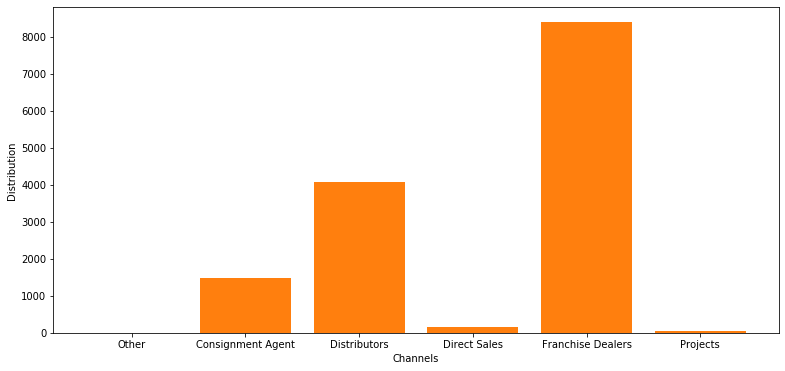

Text(0, 0.5, 'Distribution')

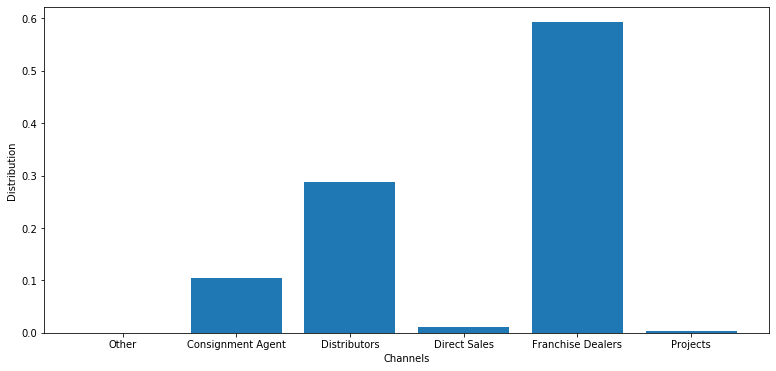

In [18]:
########## Channel distribution ##########
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6

sales_channels = ['Other','Consignment Agent','Distributors','Direct Sales','Franchise Dealers','Projects']

total = list()
for i in sales_channels:
    total.append(floorFeature_matrix[i].sum())
    
print (total)

distribution = [x/sum(total) for x in total]
print (sum(distribution))
print (distribution)
plt.bar(sales_channels, distribution)
plt.xlabel('Channels')
plt.ylabel('Distribution')

plt.bar(sales_channels, total)
plt.show()

plt.bar(sales_channels, distribution)
plt.xlabel('Channels')
plt.ylabel('Distribution')
##########################################

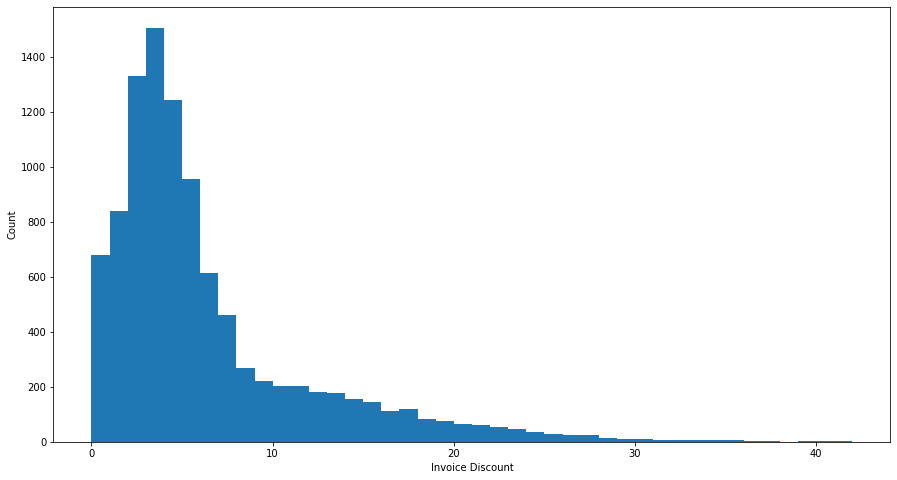

In [20]:
######### Histogram for invoice discount #########
rcParams['figure.figsize'] = 15, 8

di=pd.DataFrame()
di['Discount'] = floor_df['Invoice Discount']
y = di[di.Discount != 0]
x = y['Discount']
plt.hist(x, range=[0,42], bins=42) 
#plt.title(channel) 
plt.xlabel('Invoice Discount') 
plt.ylabel("Count")
plt.show()
###################################################   

In [46]:
print (len(floorFeature_matrix.columns))
print (len(floorLabel_matrix.columns))

161
19


In [24]:
from sklearn.model_selection import train_test_split 

array = floor_df.values
X = array[:,0:160]
y = array[:,160:]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)        

In [51]:
################# Random Forest #################

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

rmse_train = list()
rmse_val = list()
#num_of_trees = [10, 20, 50, 75, 100, 150, 200, 250, 300, 400, 500, 750]
#max_features = ['auto', 'sqrt'] 
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]         # Maximum number of levels in tree   
#max_depth.append(None)
#max_depth = [10,20,30,40,50,None]
#min_samples_split = [2, 3, 4, 5, 10]
#min_samples_leaf = [1, 2, 4] 
#bootstrap = [True, False]

for x in max_depth:
    regressor = RandomForestRegressor(n_estimators=220, max_depth=x)
    regressor.fit(X_train, y_train)

    y_pred_train = regressor.predict(X_train)
    y_pred_val = regressor.predict(X_val)

    print ('max_depth: '+str(x))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    rmse_val.append(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    print (rmse_train)
    print (rmse_val)
    print ('\n')

'''
dic_train = {'Actual':y_train[1000:1101,3], 'Predicted':y_pred_train[1000:1101,3]}
dic_val = {'Actual':y_val[1000:1101,3], 'Predicted':y_pred_val[1000:1101,3]}

df_train = pd.DataFrame(dic_train)
df_val = pd.DataFrame(dic_val)

plt.plot(df_train['Actual'], label='Actual')
plt.plot(df_train['Predicted'], color='red', label='Predicted')
plt.title('Training Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()

plt.plot(df_val['Actual'], label='Actual')
plt.plot(df_val['Predicted'], color='red', label='Predicted')
plt.title('Validation Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()
'''
'''
df_RF = pd.DataFrame({'No of trees':num_of_trees, 'RMSE_train':rmse_train, 'RMSE_val':rmse_val})
df_RF = df_RF.set_index('No of trees')
plt.plot(df_RF['RMSE_train'], label='RMSE_train')
plt.plot(df_RF['RMSE_val'], color='red', label='RMSE_val')
plt.title('RMSE')
plt.xlabel('No. of trees')
plt.ylabel('RMSE')
plt.legend()
plt.show()
'''
#################################################

max_depth: 10
Root Mean Squared Error: 683.072229472436
Root Mean Squared Error: 901.3704346737841
[683.072229472436]
[901.3704346737841]


max_depth: 20
Root Mean Squared Error: 491.10496005893395
Root Mean Squared Error: 867.6064266120787
[683.072229472436, 491.10496005893395]
[901.3704346737841, 867.6064266120787]


max_depth: 30
Root Mean Squared Error: 445.5637397398078
Root Mean Squared Error: 869.3695252111651
[683.072229472436, 491.10496005893395, 445.5637397398078]
[901.3704346737841, 867.6064266120787, 869.3695252111651]


max_depth: 40
Root Mean Squared Error: 403.08588185786544
Root Mean Squared Error: 867.5605412730642
[683.072229472436, 491.10496005893395, 445.5637397398078, 403.08588185786544]
[901.3704346737841, 867.6064266120787, 869.3695252111651, 867.5605412730642]


max_depth: 50
Root Mean Squared Error: 407.4087202472154
Root Mean Squared Error: 863.3263383678435
[683.072229472436, 491.10496005893395, 445.5637397398078, 403.08588185786544, 407.4087202472154]
[901.3

KeyboardInterrupt: 

Training set RMSE: 479.32879669876246
Validation set RMSE: 415.9680878161598


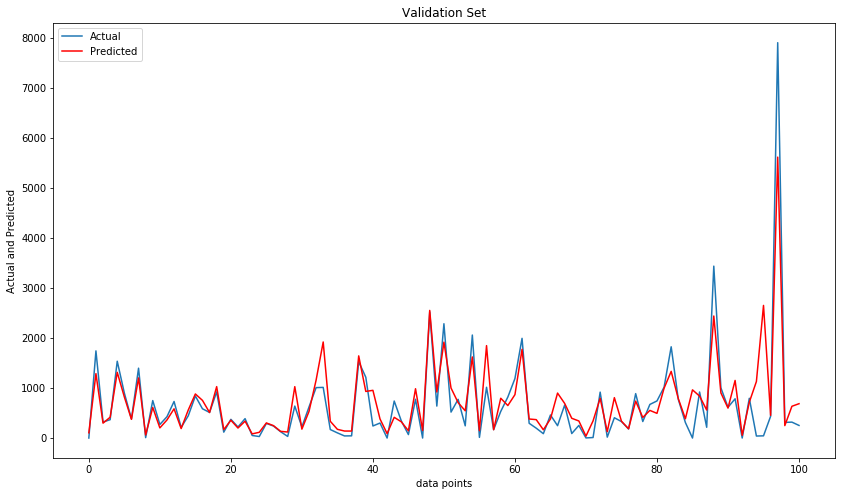

In [25]:
######## Save the selected model as a pickle file ########
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8
from sklearn.externals import joblib 
  
#regressor = RandomForestRegressor(n_estimators=220, max_depth=50)
#regressor.fit(X_train, y_train)
    
# Save the model as a pickle in a file 
#joblib.dump(regressor, 'C:/Users/ChamithM/Desktop/Bestmodels/Floortiles_RFmodel_4years.pkl')  
  
# Load the model from the file 
RandomForest = joblib.load('C:/Users/ChamithM/Desktop/Bestmodels/Floortiles_RFmodel_4years.pkl')
  
# Use the loaded model to make predictions 
y_pred_train = RandomForest.predict(X_train)
y_pred_val = RandomForest.predict(X_val)

print('Training set RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Validation set RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

#dic_train = {'Actual':y_train[1000:1101,0], 'Predicted':y_pred_train[1000:1101,0]}
dic_val = {'Actual':y_val[400:501,0], 'Predicted':y_pred_val[400:501,0]}

#df_train = pd.DataFrame(dic_train)
df_val = pd.DataFrame(dic_val)

#df_val = df_val.drop([31])
#df_val = df_val.drop([95])

plt.plot(df_val['Actual'], label='Actual')
plt.plot(df_val['Predicted'], color='red', label='Predicted')
plt.title('Validation Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()
##########################################################